# ЗЛИТТЯ ДАТАФРЕЙМІВ, АГРЕГУВАННЯ ДАНИХ ТА ВІЗУАЛІЗАЦІЯ

## Мета: Вивчення функцій Pandas для злиття, агрегування та візуалізації даних

## Завдання 1

Завантажити файл з даними про споживання енергії **"En_In.xls"**, який містить перелік показників енергозабезпечення та виробництва відновлюваної електроенергії. Ввести ці дані у структуру **DataFrame** для подальшого аналізу.

Файл містить інформацію про:
- **Країни** — назви країн, які аналізуються.
- **Енергопостачання** — загальний обсяг енергопостачання для кожної країни.
- **Енергопостачання на душу населення** — показник енергопостачання, розрахований на одну особу.
- **Відсоток відновлюваної енергії** — частка відновлюваної енергії у загальному споживанні.

Ці дані потрібні для подальших обчислень та візуалізацій, які допоможуть зрозуміти ситуацію з енергозабезпеченням та часткою відновлюваної енергетики в різних країнах.


In [1]:
import pandas as pd

file_path = 'En_In.xls'

df_table = pd.read_excel(
    file_path,
    header=None,
    skiprows=18, 
    nrows=227,
    usecols="C:F"
)

df_table.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

df_table


,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650
...,...,...,...,...
222,Viet Nam,2554,28,45.321520
223,Wallis and Futuna Islands,0,26,0.000000
224,Yemen,344,13,0.000000
225,Zambia,400,26,99.714670


## Завдання 2

Перевести дані із стовпчика **'Energy Supply'** з тераджоулів (ТДж) у гігаджоулі (ГДж). 

> **Примітка:** 1 ТДж = 1,000,000 ГДж.

Для всіх країн, у яких відсутні дані (наприклад, позначені як "..." або мають значення 0), переконайтеся, що це відображається як значення **np.NaN**.

Це завдання допомагає стандартизувати дані для подальшого аналізу, щоб забезпечити коректність відображення та обробки відсутніх або нульових значень у стовпчику **'Energy Supply'**.


In [2]:
import numpy as np

# Використовуємо apply з умовою для заміни '...' або 0 на NaN
df_table['Energy Supply'] = df_table['Energy Supply'].apply(lambda x: np.NaN if x == '...' or x == 0 else x).astype(float) * 1_000_000

# Встановлюємо 'Country' як індекс для кращого відображення та відображаємо тільки колонку 'Energy Supply'
df_table.set_index('Country', inplace=True)

# Вимикаємо наукову нотацію для відображення
pd.options.display.float_format = '{:,.0f}'.format

# Відображаємо тільки колонку 'Energy Supply'
display(df_table[['Energy Supply']])

df_table.reset_index(inplace=True)


,Energy Supply
Country,
Afghanistan,"321,000,000"
Albania,"102,000,000"
Algeria,"1,959,000,000"
American Samoa,NaN
Andorra,"9,000,000"
...,...
Viet Nam,"2,554,000,000"
Wallis and Futuna Islands,NaN
Yemen,"344,000,000"


## Завдання 3

Перейменуйте наступний список країн у колонці **'Country'**:

- **"Republic of Korea"** на **"South Korea"**
- **"United States of America"** на **"United States"**
- **"United Kingdom of Great Britain and Northern Ireland"** на **"United Kingdom"**
- **"China, Hong Kong Special Administrative Region"** на **"Hong Kong"**

Це перейменування необхідне для спрощення назв та покращення зручності читання та аналізу даних. Усі зміни повинні бути застосовані у відповідному стовпчику таблиці, щоб забезпечити стандартизовані назви країн у наборі даних.


In [3]:
# Створюємо словник для заміни назв країн
country_renames = {
    "Republic of Korea": "South Korea",
    "United States of America20": "United States",
    "United Kingdom of Great Britain and Northern Ireland19": "United Kingdom",
    "China, Hong Kong Special Administrative Region3": "Hong Kong"
}

# Застосовуємо перейменування в колонці 'Country'
df_table['Country'] = df_table['Country'].replace(country_renames)

# Відображаємо лише ті країни, які були перейменовані, для перевірки
renamed_countries = df_table[df_table['Country'].isin(country_renames.values())]
display(renamed_countries[['Country']])


,Country
43,Hong Kong
164,South Korea
214,United Kingdom
216,United States


## Завдання 4

Існує декілька країн, що мають у назві цифри та/або дужки. Обов’язково видаліть ці елементи з назв, щоб залишити лише основну назву країни. Наприклад:

- **"Bolivia (Plurinational State of)"** має бути змінено на **"Bolivia"**.
- **"Switzerland17"** має бути змінено на **"Switzerland"**.

Це очищення необхідне для стандартизації назв країн у наборі даних, що полегшить аналіз та уникне дублювання через різні варіанти назв.


In [4]:
# Видаляємо кінцеві цифри та дужки разом з текстом всередині
df_table['Country'] = df_table['Country'].str.replace(r'\d+$|\(.*\)', '', regex=True).str.strip()

# Перевіряємо результат для колонки з країнами
display(df_table[['Country']])

# Перевіряємо, чи залишилась Австралія без дужок
display(df_table[df_table['Country'].isin(['Australia'])])


,Country
0,Afghanistan
1,Albania
2,Algeria
3,American Samoa
4,Andorra
...,...
222,Viet Nam
223,Wallis and Futuna Islands
224,Yemen
225,Zambia


,Country,Energy Supply,Energy Supply per Capita,% Renewable
11,Australia,"5,386,000,000",231,12


## Завдання 5

Завантажте дані про ВВП з файлу **"gpd.csv"**, який містить дані Світового банку про ВВП країн з 1960 до 2015 року. 

### Вимоги:
1. Обов’язково виключити заголовки з датафрейму під час завантаження.
2. Перейменувати наступний список країн у колонці **'Country'**:
   - **"Korea, Rep."** на **"South Korea"**
   - **"Iran, Islamic Rep."** на **"Iran"**
   - **"Hong Kong SAR, China"** на **"Hong Kong"**

Це завдання допоможе забезпечити коректність даних, стандартизувати назви країн для полегшення подальшого аналізу та уникнення можливих дублювань через різні варіанти написання.


In [5]:
# Визначаємо назви колонок: перші чотири колонки мають певні назви, решта — це роки від 1960 до 2015
columns = ['Country', 'Country Code', 'Indicator Name', 'Indicator Code'] + list(range(1960, 2016))

# Завантажуємо CSV файл, пропускаючи перші 5 рядків і встановлюючи власні назви колонок
df_gpd = pd.read_csv('gpd.csv', header=None, skiprows=5, names=columns)

df_gpd.columns = df_gpd.columns.astype(str)

# Перевірка результату після завантаження даних
display(df_gpd.head(1))

# Словник для перейменування країн
country_gpd_renames = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong",
}

# Застосовуємо перейменування країн у колонці 'Country'
df_gpd['Country'] = df_gpd['Country'].replace(country_gpd_renames)

pd.options.display.float_format = '{:.3f}'.format

# Відображаємо тільки перейменовані країни для перевірки результату
renamed_countries_gpd = df_gpd[df_gpd['Country'].isin(country_gpd_renames.values())]
display(renamed_countries_gpd[['Country']])


,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"2,467,703,911",NaN,NaN,NaN,NaN,NaN


,Country
93,Hong Kong
109,Iran
123,South Korea


## Завдання 6

Завантажити дані з файлу **"scimagojr.xlsx"**, який класифікує країни на основі їхніх публікацій у журналах у галузі енергетичного машинобудування та енергетичних технологій. 

Ці дані містять інформацію про наукову активність країн, що допомагає оцінити їхній вклад у розвиток енергетичних технологій. Після завантаження даних їх можна використовувати для подальшого аналізу та порівняння наукової діяльності різних країн.


In [6]:
df_scimagojr = pd.read_excel(
    'scimagojr.xlsx',
    nrows=192,
    usecols="A:H"
)

df_scimagojr.head(15)

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.700,138
1,2,United States,96661,94747,792274,265436,8.200,230
2,3,Japan,30504,30287,223024,61554,7.310,134
3,4,United Kingdom,20944,20357,206091,37874,9.840,139
4,5,Russian Federation,18534,18301,34266,12422,1.850,57
5,6,Canada,17899,17620,215003,40930,12.010,149
6,7,Germany,17027,16831,140566,27426,8.260,126
7,8,India,15005,14841,128763,37209,8.580,115
8,9,France,13153,12973,130632,28601,9.930,114
9,10,South Korea,11983,11923,114675,22595,9.570,104


## Завдання 7

Приєднати три набори даних із завдань 1–6 до нового набору даних, використовуючи перетин назв країн.

- Використовуються лише дані про ВВП за останні 10 років (2006–2015 рр.) і лише 15 найкращих країн за рейтингом Scimagojr (Rank від 1 до 15).
- Індексом цього DataFrame повинна бути назва країни, а стовпцями мають бути: 
  - **Rank**, **Documents**, **Citable documents**, **Citations**, **Self-citations**, **Citations per document**, **H index**, **Energy Supply**, **Energy Supply per Capita**, **% Renewable**
  - Десятирічні дані за роками: **2006**, **2007**, **2008**, **2009**, **2010**, **2011**, **2012**, **2013**, **2014**, **2015**

Повинно бути отримано DataFrame з 15 рядками та 20 стовпцями.


In [7]:
# Крок 1: Відфільтровуємо топ-15 країн за рангом у df_scimagojr
top_15_countries = df_scimagojr.head(15)

if 'Ukraine' not in top_15_countries['Country'].values:
    ukraine_row = df_scimagojr[df_scimagojr['Country'] == 'Ukraine']
    top_15_countries = pd.concat([top_15_countries, ukraine_row])

# Крок 2: Обираємо потрібні колонки з df_table
df_table_filtered = df_table[['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']]

# Крок 3: Обираємо потрібні колонки з df_gdp (від 2006 до 2015)
df_gdp_filtered = df_gpd[['Country', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

# Крок 4: Виконуємо об'єднання всіх трьох датафреймів
# Об'єднання df_scimagojr і df_table за колонкою 'Country'
merged_df = top_15_countries.merge(df_table_filtered, on='Country', how='left')

# Об'єднання результату з df_gdp_filtered за колонкою 'Country'
merged_df = merged_df.merge(df_gdp_filtered, on='Country', how='left')

# Крок 5: Встановлюємо 'Country' як індекс і вибираємо потрібні колонки
merged_df.set_index('Country', inplace=True)
merged_df = merged_df[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
                       'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', 
                       '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

# Відображаємо результат
display(merged_df)
merged_df.shape


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.700,138,127191000000.000,93,19.755,3992331462570.890,4559041383517.930,4997775145605.960,5459247267275.140,6039658508485.590,6612490294273.650,7124977970399.610,7672447738017.420,8230120617793.520,8797998940421.279
United States,2,96661,94747,792274,265436,8.200,230,90838000000.000,286,11.571,14792303791800.000,15055395304800.000,15011490541400.000,14594842181900.000,14964372000000.000,15204019634600.000,15542161722300.000,15773666098800.000,16156618476000.000,16548573278300.000
Japan,3,30504,30287,223024,61554,7.310,134,18984000000.000,149,10.233,5496541517363.310,5617035943770.730,5558526873313.820,5251308399909.320,5498717815809.770,5473738114222.050,5569101602926.180,5644658523313.420,5642884448582.190,5669563143140.970
United Kingdom,4,20944,20357,206091,37874,9.840,139,7920000000.000,124,10.600,2419630700401.730,2482203235475.900,2470614405284.300,2367047611711.990,2403504326328.800,2450911011124.850,2479808627472.190,2533370110012.360,2605643189894.930,2666333396477.130
Russian Federation,5,18534,18301,34266,12422,1.850,57,30709000000.000,214,17.289,1385792607182.580,1504071117741.300,1583004071092.110,1459199142720.260,1524917468442.010,1589942641764.290,1645875899596.270,1666934123163.160,1678708855070.860,1616148858033.770
Canada,6,17899,17620,215003,40930,12.010,149,10431000000.000,296,61.945,1564468853329.450,1596739898466.320,1612713061250.240,1565144676082.310,1613406134731.120,1664086754804.890,1693132927878.080,1730687770724.130,1773485821199.770,1792608764608.810
Germany,7,17027,16831,140566,27426,8.260,126,13261000000.000,165,17.902,3332890754966.890,3441560834437.090,3478809377483.440,3283339933774.830,3417298013245.030,3542371125827.810,3556723774834.440,3567317390728.480,3624386278145.700,3685555907284.770
India,8,15005,14841,128763,37209,8.580,115,33195000000.000,26,14.969,1265894322131.090,1374865195244.500,1428360609657.800,1549482541544.700,1708458876829.920,1821872415623.620,1924235460945.250,2051981849791.690,2200616575310.970,2367206118959.060
France,9,13153,12973,130632,28601,9.930,114,10597000000.000,166,17.020,2607839735099.340,2669423841059.600,2674637086092.710,2595966887417.220,2646994701986.750,2702031788079.470,2706968211920.530,2722566887417.220,2729631788079.470,2761185430463.580


(16, 20)

## Завдання 8

Створити функцію для визначення середнього ВВП країн за останні 10 років.

Функція повинна:
1. Використовувати дані про ВВП за період з 2006 по 2015 рік.
2. Розрахувати середнє значення ВВП для кожної країни за цей період.
3. Повернути результати у вигляді Series, відсортованої за спаданням середнього значення ВВП.

Ця функція дозволяє швидко отримати усереднені дані про ВВП для подальшого аналізу та порівняння між країнами.


In [8]:
def calculate_average_gdp(merged_df):
    # Вибираємо колонки з ВВП за 2006-2015 роки
    gdp_columns = [str(year) for year in range(2006, 2016)]
    
    # Обчислюємо середнє значення ВВП за ці роки для кожної країни
    avg_gdp = merged_df[gdp_columns].mean(axis=1)
    
    # Створюємо Series з середнім ВВП, використовуючи назву країни як індекс
    avg_gdp_series = pd.Series(avg_gdp.values, index=merged_df.index, name="Average GDP")
    
    # Сортуємо за спаданням
    avg_gdp_series_sorted = avg_gdp_series.sort_values(ascending=False)
    
    return avg_gdp_series_sorted


# Викликаємо функцію для обчислення середнього ВВП
average_gdp_series = calculate_average_gdp(merged_df)
display(average_gdp_series)


Country
United States        15364344302990.000
China                 6348608932836.100
Japan                 5542207638235.176
Germany               3493025339072.848
France                2681724635761.589
United Kingdom        2487906661418.417
Brazil                2189794143774.905
Italy                 2120175089933.776
India                 1769297396603.860
Canada                1660647466307.512
Russian Federation    1565459478480.661
Spain                 1418078278145.694
Australia             1164042729991.427
South Korea           1106714508244.852
Iran                   444155754051.095
Ukraine                139685629963.497
Name: Average GDP, dtype: float64

## Завдання 9

Створити функцію для визначення зміни ВВП за останні 10 років для країни, яка займає 5-е місце за середнім значенням ВВП.

Функція повинна:
1. Розрахувати середній ВВП для кожної країни за період з 2006 по 2015 рік та відсортувати країни за цими значеннями.
2. Визначити назву країни, яка має 5-е за величиною середнє значення ВВП.
3. Розрахувати зміну ВВП для цієї країни між 2006 і 2015 роками.
4. Повернути назву країни та значення зміни ВВП.

Ця функція допомагає аналізувати динаміку економічного зростання для країн із високим середнім ВВП.


In [9]:
def gdp_change_for_fifth_country(merged_df):
    # Вибираємо колонки з ВВП за 2006-2015 роки
    gdp_columns = [str(year) for year in range(2006, 2016)]
    
    # Обчислюємо середній ВВП для кожної країни та сортуємо за спаданням
    avg_gdp_series = merged_df[gdp_columns].mean(axis=1)
    sorted_gdp = avg_gdp_series.sort_values(ascending=False)
    
    # Отримуємо назву п'ятої країни за списком
    fifth_country_name = sorted_gdp.index[4]  # 5-та країна, тому індекс 4
    
    # Обчислюємо зміну ВВП за 10 років для цієї країни
    gdp_start = merged_df.loc[fifth_country_name, '2006']
    gdp_end = merged_df.loc[fifth_country_name, '2015']
    gdp_change = gdp_end - gdp_start
    
    # Повертаємо кортеж із назвою країни та зміною ВВП
    return (fifth_country_name, gdp_change)

# Викликаємо функцію для обчислення зміни ВВП для п'ятої країни
fifth_country_gdp_change = gdp_change_for_fifth_country(merged_df)
print(fifth_country_gdp_change)


('France', 153345695364.24023)


## Завдання 10

Створити функцію для визначення країни з максимальним відсотком поновлюваних джерел енергії (**% Renewable**) та самого значення цього відсотка.

Функція повинна:
1. Знайти максимальне значення у колонці **% Renewable**.
2. Визначити країну, що відповідає цьому значенню.
3. Повернути назву країни та значення відсотка поновлюваних джерел енергії.

Ця функція дозволяє швидко визначити країну, яка максимально використовує відновлювані джерела енергії, для подальшого аналізу екологічних стратегій різних країн.


In [10]:
def country_with_max_renewable(merged_df):
    # Знаходимо максимальне значення у колонці '% Renewable' та відповідну країну
    max_renewable_value = merged_df['% Renewable'].max()
    country_with_max_renewable = merged_df['% Renewable'].idxmax()
    
    # Повертаємо кортеж із назвою країни та відсотком поновлюваних джерел
    return (country_with_max_renewable, max_renewable_value)

# Викликаємо функцію для визначення країни з максимальним відсотком поновлювальних джерел
max_renewable_country = country_with_max_renewable(merged_df)
print(max_renewable_country)


('Brazil', 69.64803)


## Завдання 11

Створити стовпець для оцінки чисельності населення, використовуючи значення енергопостачання (**Energy Supply**) та енергопостачання на душу населення (**Energy Supply per Capita**). 

Питання: яка країна є шостою за чисельністю населення згідно з цією оцінкою?

Функція повинна:
1. Розрахувати оцінку чисельності населення для кожної країни як відношення **Energy Supply** до **Energy Supply per Capita**.
2. Додати цей розрахунок як новий стовпець **Population Estimate**.
3. Відсортувати країни за чисельністю населення за спаданням та визначити назву країни, що займає шосте місце за цією оцінкою.

Ця функція дозволяє оцінити населення кожної країни на основі її споживання енергії, що може бути корисним для подальшого економічного аналізу.


In [11]:
def add_population_column_and_get_sixth_country(merged_df):
    # Створюємо стовпець з оцінкою чисельності населення
    merged_df['Population Estimate'] = merged_df['Energy Supply'] / merged_df['Energy Supply per Capita']
    
    # Сортуємо за чисельністю населення за спаданням
    population_sorted = merged_df.sort_values(by='Population Estimate', ascending=False)
    
    # Отримуємо назву країни та оцінку для шостої країни за чисельністю населення
    sixth_country_name = population_sorted.index[5]  # 6-та країна, тому індекс 5
    sixth_country_population = population_sorted.loc[sixth_country_name, 'Population Estimate']
    
    # Повертаємо кортеж із назвою країни та оцінкою чисельності населення
    return (sixth_country_name, sixth_country_population)

# Викликаємо функцію для обчислення чисельності населення та отримання 6-ї країни
sixth_country_population = add_population_column_and_get_sixth_country(merged_df)
print(sixth_country_population)


('Japan', 127409395.97315437)


## Завдання 12

Створити стовпець для оцінки кількості цитованих документів на одну особу. 

Питання: який взаємозв'язок існує між кількістю цитованих документів на душу населення та енергозабезпеченням на душу населення? Використати метод `.corr()` для обчислення кореляції Пірсона.

Функція повинна:
1. Розрахувати оцінку чисельності населення, якщо її ще не було розраховано.
2. Створити новий стовпець **Citations per Capita**, який обчислюється як відношення **Citable documents** до **Population Estimate**.
3. Обчислити кореляцію між стовпцями **Citations per Capita** та **Energy Supply per Capita** за допомогою кореляції Пірсона.

Це завдання дозволяє проаналізувати зв'язок між кількістю цитованих наукових документів на душу населення та рівнем енергозабезпечення, що може вказувати на наукову активність та енергетичний розвиток різних країн.


In [12]:
def calculate_citation_energy_correlation(merged_df):
    # Створюємо стовпець з чисельністю населення
    merged_df['Population Estimate'] = merged_df['Energy Supply'] / merged_df['Energy Supply per Capita']
    
    # Створюємо стовпець з оцінкою кількості цитованих документів на одну особу
    merged_df['Citations per Capita'] = merged_df['Citable documents'] / merged_df['Population Estimate']
    
    # Обчислюємо кореляцію між 'Citations per Capita' та 'Energy Supply per Capita'
    correlation = merged_df['Citations per Capita'].corr(merged_df['Energy Supply per Capita'])
    
    return correlation

# Викликаємо функцію для обчислення кореляції
correlation_result = calculate_citation_energy_correlation(merged_df)
print(correlation_result)


0.7932091545534895


## Завдання 13

Створити новий стовпець, у якому записується **1**, якщо значення відсотка відновлюваної енергії (**% Renewable**) для країни дорівнює або вище медіанного значення для всіх країн, і **0**, якщо значення **% Renewable** нижче медіани.

Функція повинна:
1. Обчислити медіану для стовпця **% Renewable**.
2. Додати новий стовпець **Renewable Indicator**, який буде приймати значення **1**, якщо значення **% Renewable** для країни дорівнює або перевищує медіану, і **0** — якщо менше.
3. Повернути Series із стовпця **Renewable Indicator**, де індекс — назва країни.

Цей індикатор дозволяє класифікувати країни за рівнем використання відновлюваної енергії відносно медіанного значення, що допомагає ідентифікувати країни з вищим або нижчим рівнем використання відновлюваних джерел.


In [13]:
def create_renewable_indicator_series(merged_df):
    # Обчислюємо медіану для стовпця '% Renewable'
    median_renewable = merged_df['% Renewable'].median()
    
    # Створюємо новий стовпець, який буде 1, якщо '% Renewable' >= медіани, і 0, якщо менше
    merged_df['Renewable Indicator'] = (merged_df['% Renewable'] >= median_renewable).astype(int)
    
    # Сортуємо датафрейм за колонкою 'Rank'
    sorted_df = merged_df.sort_values(by='Rank')
    
    # Повертаємо Series із стовпця 'Renewable Indicator', де індекс — назва країни
    renewable_indicator_series = pd.Series(sorted_df['Renewable Indicator'].values, 
                                           index=sorted_df.index, 
                                           name='Renewable Indicator')
    
    return renewable_indicator_series

# Викликаємо функцію для створення Series з індикатором відновлюваної енергії
renewable_indicator_series = create_renewable_indicator_series(merged_df)
display(renewable_indicator_series)


Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Ukraine               0
Name: Renewable Indicator, dtype: int32

## Завдання 14

Використовуючи наданий словник, згрупувати країни за континентами. Потім створити DataFrame, який відображає розмір вибірки (кількість країн на кожному континенті), а також суму, середнє та стандартне відхилення для оцінки чисельності населення для кожного континенту.

### Вимоги:
1. Використати словник `ContinentDict` для визначення континенту для кожної країни.
2. Додати нову колонку **Continent** на основі цього словника.
3. Розрахувати оцінку чисельності населення для кожної країни, якщо вона ще не була розрахована.
4. Групувати дані за континентами та обчислити:
   - Розмір вибірки (кількість країн на континенті),
   - Суму чисельності населення,
   - Середнє значення чисельності населення,
   - Стандартне відхилення чисельності населення.

Цей DataFrame дозволяє аналізувати демографічні показники за континентами, що є корисним для порівняння населення та його варіації в межах кожного континенту.


In [14]:
# Словник для визначення континенту кожної країни
ContinentDict = {
        'China': 'Asia',
        'United States': 'North America',
        'Japan': 'Asia',
        'United Kingdom': 'Europe',
        'Russian Federation': 'Europe',
        'Canada': 'North America',
        'Germany': 'Europe',
        'India': 'Asia',
        'France': 'Europe',
        'South Korea': 'Asia',
        'Italy': 'Europe',
        'Spain': 'Europe',
        'Iran': 'Asia',
        'Australia': 'Australia',
        'Brazil': 'South America',
        'Ukraine': 'Europe'
}
    
# Додаємо колонку 'Continent' у merged_df на основі словника
merged_df['Continent'] = merged_df.index.map(ContinentDict)

def create_continent_statistics(merged_df):
    # Додаємо колонку 'Population Estimate' (якщо її ще немає)
    if 'Population Estimate' not in merged_df.columns:
        merged_df['Population Estimate'] = merged_df['Energy Supply'] / merged_df['Energy Supply per Capita']
    
    # Групуємо за континентом і обчислюємо розмір вибірки, суму, середнє та стандартне відхилення
    continent_stats = merged_df.groupby('Continent')['Population Estimate'].agg(['size', 'sum', 'mean', 'std'])
    
    return continent_stats

# Викликаємо функцію для створення DataFrame з континентальними статистиками
continent_statistics_df = create_continent_statistics(merged_df)
display(continent_statistics_df)


,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.611,579733277.322,679097888.366
Australia,1,23316017.316,23316017.316,NaN
Europe,7,503200695.254,71885813.608,33736006.428
North America,2,352855249.480,176427624.740,199669644.857
South America,1,205915254.237,205915254.237,NaN


## Завдання 15

Створити бульбашкову діаграму, яка відображає залежність відсотка поновлюваних джерел енергії (**% Renewable**) від рейтингу країни (**Rank**).

### Вимоги:
- **X-вісь**: Рейтинг країни (**Rank**)
- **Y-вісь**: Відсоток поновлюваних джерел енергії (**% Renewable**)
- **Розмір бульбашок**: ВВП країни за 2015 рік (чим більший ВВП, тим більша бульбашка)
- **Колір**: Континент країни (використовуючи кольорову схему для кожного континенту)

### Додатково:
- Відображати назви країн на бульбашках для полегшення ідентифікації.
- Легенда повинна пояснювати, який колір відповідає якому континенту.

Ця візуалізація допоможе виявити зв’язок між рейтингом країни, відсотком поновлюваних джерел енергії та ВВП, що може бути корисним для аналізу енергетичної політики країн та їх економічного стану.


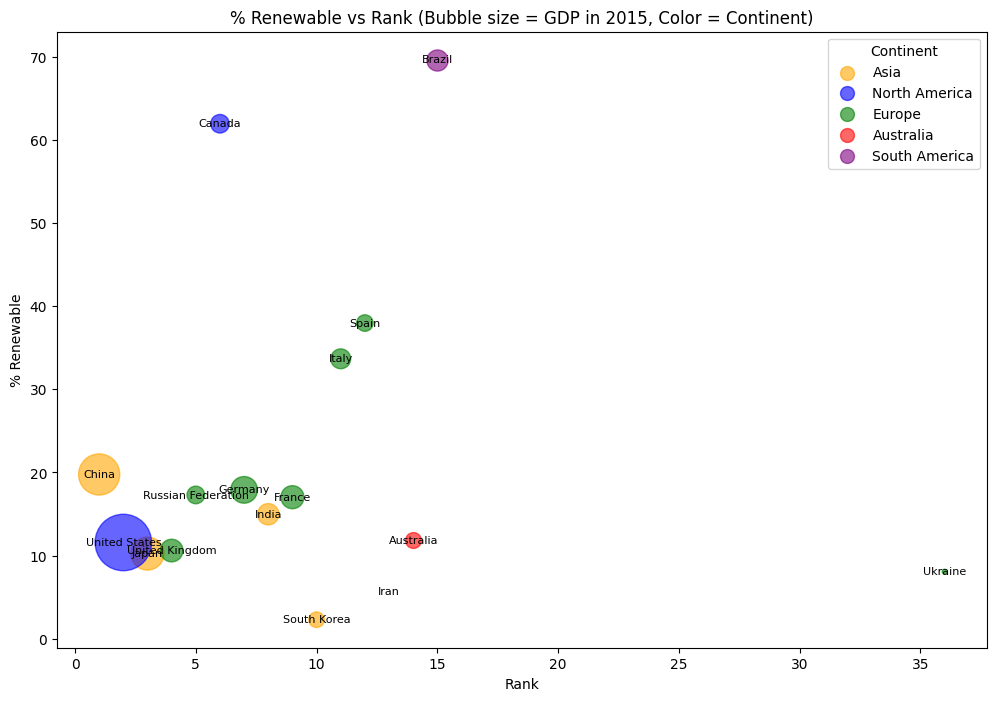

In [15]:
import matplotlib.pyplot as plt

# Функція для створення бульбашкової діаграми з назвами країн на бульбашках
def create_bubble_chart_with_labels(merged_df):
    # Налаштування кольорів для кожного континенту
    continent_colors = {
        'Asia': 'orange', 
        'North America': 'blue', 
        'Europe': 'green', 
        'Australia': 'red', 
        'South America': 'purple'
    }
    
    # Фільтруємо рядки з NaN або нескінченними значеннями в колонках 'Rank' та '% Renewable'
    filtered_df = merged_df.dropna(subset=['Rank', '% Renewable'])
    
    # Визначення розмірів бульбашок на основі ВВП за 2015 рік
    sizes = filtered_df['2015'] / 1e10  # Зменшуємо масштаб для кращої видимості
    
    # Побудова бульбашкової діаграми
    plt.figure(figsize=(12, 8))
    for continent, color in continent_colors.items():
        subset = filtered_df[filtered_df['Continent'] == continent]
        plt.scatter(
            subset['Rank'], subset['% Renewable'], 
            s=subset['2015'] / 1e10,  # Розмір бульбашок на основі ВВП за 2015 рік
            alpha=0.6, color=color
        )
        # Додаємо назви країн на бульбашки
        for i in range(subset.shape[0]):
            plt.text(
                subset['Rank'].iloc[i], 
                subset['% Renewable'].iloc[i], 
                subset.index[i], 
                fontsize=8, ha='center', va='center'
            )
    
    # Однакова легенда для кожного континенту
    for continent, color in continent_colors.items():
        plt.scatter([], [], color=color, alpha=0.6, s=100, label=continent)
    
    # Додаємо підписи та легенду
    plt.xlabel('Rank')
    plt.ylabel('% Renewable')
    plt.title('% Renewable vs Rank (Bubble size = GDP in 2015, Color = Continent)')
    plt.legend(title='Continent')
    plt.show()

# Викликаємо функцію для побудови діаграми
create_bubble_chart_with_labels(merged_df)
